# Data Science

Before starting the exercises make sure the GPU is enabled


*   Go to the runtime menu (&#8593; )
*   Select *Change runtime type*
*   Select GPU as *Hardware accelerator*


## Machine Learning (30 min)

### Exercise 1 (30 min)
Using sklearn library, find the fitting algorithm to classify whether someone has diabetes or not according to the dataset found in the repository as `Data_science/machine_learning/diabetes.csv`. The column containing the target is 'Outcome'. 

An accuracy of around 0.7 is considered acceptable, but make sure to try different models to find the best one.


---


To upload the `diabetes.csv` file to google colab run the cell below. It will display a button for upload. After upload, file will be visible on the files tab on your left (folder icon)

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23106 bytes


In [28]:
import sklearn
import pandas as pd 
import numpy as np

###score and train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score
#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
#some preprocessing 
from sklearn.preprocessing import MinMaxScaler
#plotting
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
#load the dataset into a pndas datarame

dataframe_diabetes = pd.read_csv('diabetes.csv')

In [15]:
dataframe_diabetes.describe()
dataframe_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Pregnancies


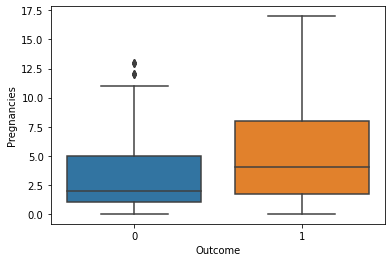

Glucose


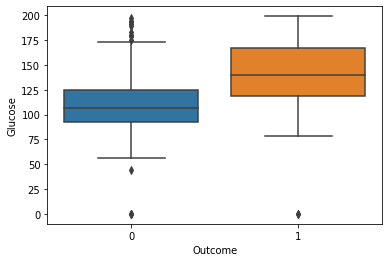

BloodPressure


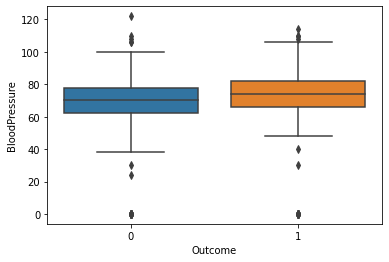

SkinThickness


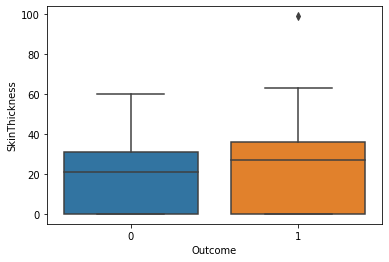

Insulin


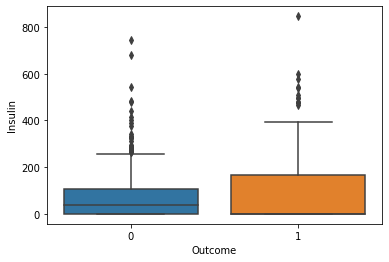

BMI


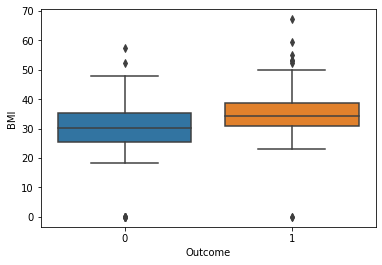

DiabetesPedigreeFunction


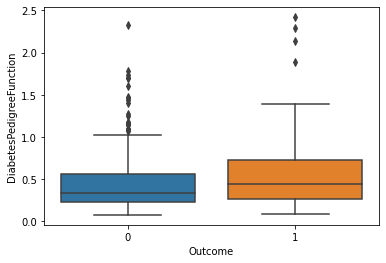

Age


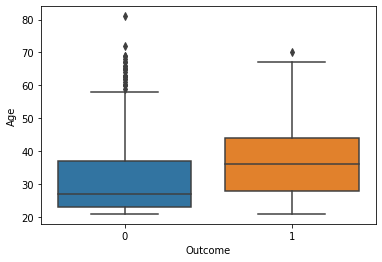

In [14]:
#inspect distribtuion 
for feature in list(dataframe_diabetes.drop('Outcome',axis=1).columns):
  print(feature)
  sns.boxplot(data=dataframe_diabetes, y=feature, x="Outcome")
  plt.show()
#not all feature seams to be related to the case of diabetes or not 
#mean contenders are Glucose, age, pregnencies
#also we can see the the scale of the different features is not the same normlization and standarization could be helpfull 
#some models can be sensitive to outliers 


Text(0, 0.5, 'Features')

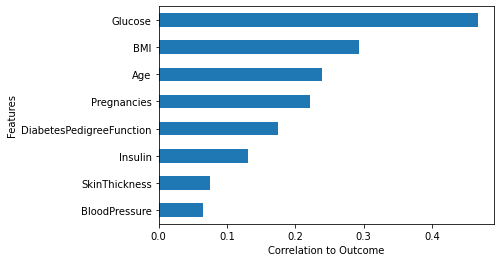

In [24]:
#pearson correlation coeffiecient 

cor = dataframe_diabetes.corr()
cor_target = (cor["Outcome"])
#Selecting highly correlated features
#relevant_features = cor_target[cor_target>0.2]
#relevant_features
imp_coef = cor_target.drop(['Outcome']).sort_values()
imp_coef.plot(kind = "barh")
plt.xlabel('Correlation to Outcome')
plt.ylabel('Features')


In [27]:
#check if dataset is balanced
print('# of samples with diabete:', dataframe_diabetes[dataframe_diabetes['Outcome']==1]['Outcome'].value_counts())
print('# of samples without diabete:',dataframe_diabetes[dataframe_diabetes['Outcome']==0]['Outcome'].value_counts())

#either we use one the sampling methods ; oversampling increase minority or down sampling decreasing the majority or synthetic sampling
# without going into the details will use a cross validation and stratified to make sure the training is balanced

# of samples with diabete: 1    268
Name: Outcome, dtype: int64
# of samples without diabete: 0    500
Name: Outcome, dtype: int64


In [42]:

#lets scale our features and then benchmark well known supervised ml to select the best model



X_features = dataframe_diabetes.drop('Outcome',axis=1)
y_target = dataframe_diabetes['Outcome']

#intatiate a minmaxscaler and fitted on the set of features 

scaler = MinMaxScaler()
#print(scaler.fit_transform(X_features))
X_features_scaled = scaler.fit_transform(X_features)


models = []

models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier(n_estimators=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP',MLPClassifier()))

results = []
names = []

for name, model in models:
   
    kfold = model_selection.KFold(n_splits=6)
    cv_results = model_selection.cross_val_score(model, X_features_scaled, y_target, cv=kfold, scoring='accuracy')
    for x in cv_results:
        results = []
        results.append(x)
        results.append(name)
        names.append(results)
    msg = "The %s model highlighted the following mean and std accuracy: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)

History_ml_accuracy= pd.DataFrame(names, columns = 
                    ['Accuracy','ML algorithm'])




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'Accuracy')

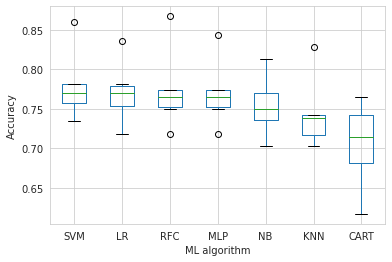

In [43]:

grouped = History_ml_accuracy.groupby(["ML algorithm"])
df2 = pd.DataFrame({col:vals['Accuracy'] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]
df2.boxplot()
plt.xlabel('ML algorithm')
plt.ylabel('Accuracy')

#the svm and logistic regression highlights the best median accuracy arround 78%, 
#scaling helpe us reduce the std of the models over the kfold cross validation
#ofcourse this is a basic training test, we could tune the hyperparameters and enhance the perforamce.

## Deep Learning 1 (1 hour)

### Exercise 1 (10 min) -- General Questions

##### 1.1 activation functions & loss

For each of the following supervised learning task, edit this cell (press enter or double click) to replace the statements in bold to write:
- the name of the most commonly used activation function for the output layer
- the name of a suitable loss function



1. Binary classification:  **Sigmoid / Binary cross entropy**
2. Multiclass classification (pick 1 class out of n possible classes):  **Softmax / Cross entropy**
3. Multilabel classification (pick k classes out of n possible classes, k can change from one sample to the next):  **Sigmoid / Binary cross entropy**
4. Single output regression:  **Linear / Mean square error**
5. Multiple output regression:  **Linear / Mean square error**

##### 1.2 Optimization & Generalization in Deep Learning

Edit this cell to write **T** (True) or **F** (False) *before* each assertion

1. **T** A very high learning rate can make the optimization process diverge
1. **T** Decreasing the learning rate after a few epochs can improve convergence on the training set
1. **T** Momentum SGD uses an accumulation of past gradients in its update
1. **F** Adding momentum to vanilla SGD ensures the convergence to a global optimum
1. **T** Skip connections in resnets make it easier to train deeper networks
1. **T** Adding dropout makes is easier to train deeper networks
1. **F** Data augmentation is typically used to accelerate the convergence on the training set
1. **T** If a network is overfitting then it does not generalize well
1. **F** The loss on the test set always decreases in a monotonic way
1. **T** Data augmentation is typically used to reduce overfitting
1. **T** Increase hidden layers dimensions (e.g. nb_filter for conv layers) usually helps overcome underfitting

### Exercise 2 (5 min) --  Overfit and underfit

Consider the following convergence plot for 4 different models on the same training set:
<img src="https://i.imgur.com/L0ke4is.png" style="width: 1000px; height: 400px;" />

Assign the plot name to the matching model. All the models were trained on the same data set with around a thousand samples in 64 dimensions and noisy class labels:

Edit this cell to replace the **X**s with the Model names (A/B/C/D)

- Linear classification model (logistic regression) (no regularization): **D**
- MLP with 1024 hidden units (no regularization): **C**
- MLP with 1024 hidden units (dropout 0.5): **A**
- MLP with 1024 hidden units (dropout 0.9): **B**

*Hint: analyse the overfitting and underfitting behaviors of each model and relate your conclusions to their expected capacity and the use of regularization.*


### Exercise 3  (20 min) -- Recommender Systems

#### 3.1 A wrong model

We build a recommender system that takes as input a user id and an item id and outputs a rating (continuous value between 1 and 10).
Let's suppose there are `10000` users and `1000` items.
There are 6 wrong / incoherent lines in this code, correct them all, and place a short comment using `#` in the same line.

In [47]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Embedding, Flatten
from tensorflow.keras.layers import Dense, Dropout, Dot, Concatenate
from tensorflow.keras.models import Model

tf.random.set_seed(0)  # fix the random seed (do not change this line)

EMBEDDING_SIZE = 128#do we need 10000, 
NUM_ITEMS = 1000 #number of items is 1000 not 5
NUM_USERS = 10000

item_embedding = Embedding(output_dim=EMBEDDING_SIZE,
                           input_dim=NUM_ITEMS,
                           input_length=1)

user_embedding = Embedding(output_dim=EMBEDDING_SIZE,
                           input_dim=NUM_USERS,
                           input_length=1)


item = Input(shape=(1,), dtype='int32')#item = Input(name='item', shape=(1,), dtype='int32') dont tjink its an error just visibility
user = Input(shape=(1,), dtype='int32')#user = Input(name='user',shape=(1,), dtype='int32')dont tjink its an error just visibility


emb_item = Flatten()(item_embedding(item))
emb_user = Flatten()(user_embedding(user))

model_item = Model(inputs=item,outputs=emb_item)
model_user = Model(inputs=user,outputs=emb_user)

x = Concatenate()([emb_item, emb_user]) #Concatenate(name='x')([emb_item, emb_user]) dont tjink its an error just visibility
#
x = Dropout(0.2)(x)#0.99 too much dropout and the next layer had only one neuron does not make sense (from my perspective)
x = Dense(128, activation="relu")(x)#instead of one neuron make it bigger (tunning) and then next output layer can heve one neuron
x = Dense(1, activation="relu")(x)#output continous value from 1 to 10, tanh value between -1 and 1

model = Model([item, user], x)
model.compile(optimizer='rmsprop', loss='mse')#output continous value and cross entropy not appropriate

In [48]:
import numpy as np
np.equal(model.layers[2].get_weights()[0],model_item.layers[1].get_weights()[0])

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

#### 3.2 Most similar embedding vectors

We want to find the most similar items to a given vector $x$ using the embedding matrix $W$ of the previous (untrained) recommendation model.

1. Retreive the right embedding matrix from the previous model and store it in `items_embeddings`

In [50]:
#model.layers
#A bit confused here 
item_embeddings =  model.layers[2].get_weights()[0]# TODO: change this
print(item_embeddings.shape)
#1000 item each one embedeed in vector of size 128

(1000, 128)


2. Write a function to compute the cosine similariti**es** between a vector x and all the possible vectors y in the item embedding matrix. Recall that for a given vector y, the cosine similarity is given by:

$$cos(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x}^T \mathbf{y}}{|| \mathbf{x} ||_2 || \mathbf{y} ||_2 }$$


In [ ]:
import numpy as np


def cosine_sims(x, y):
    

    return x@y.T / (np.linalg.norm(x)*np.linalg.norm(y))


# Arbitrary query vector x used for testing:
x = np.ones(shape=(EMBEDDING_SIZE,))
print(x.shape)
similarities = cosine_sims(x, item_embeddings)
print(similarities)

Use this cell to check your results but do not edit it:

In [67]:
print("shape:", cosine_similarity.shape)
print(f"min={similarities.min()}, max={similarities.max()}")

shape: (1, 1000)
min=-0.010470462817005262, max=0.009605687551175336


3. Write a function to find the 3 most similar item vectors to our query vector `x`:

In [53]:
def most_similar(x, item_embeddings, top_n=3):
    similarities = cosine_sims(x, item_embeddings)
    dict_sim_enum =  dict(enumerate(similarities))
    sorted_dict=dict(sorted(dict_sim_enum.items(), key=lambda item: item[1],reverse=True))
    return list(sorted_dict.items())[:3]


most_similar(x, item_embeddings, top_n=3)
# possible output if the function is well written: 
# A list of (item_id, similarity) tuples in descending similarity order:
# [(686, 0.333...),
# (728, 0.292...),
# (675, 0.257...)]

[(536, 0.009605687551175336),
 (240, 0.009595532484382578),
 (204, 0.008234789514528695)]

### Exercise 4 (25 min) -- Computer Vision

A datascientist named Alice has built the following CNN:

In [54]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

In [55]:
input = Input((112, 112, 3))
x = Convolution2D(32, kernel_size=(3, 3), padding='same',
                  activation='relu', name='conv1')(input)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Convolution2D(64, kernel_size=(3, 3), padding='same',
                  activation='relu', name="conv2")(x)
x = Convolution2D(64, kernel_size=(3, 3), padding='same',
                  activation='relu', name="conv3")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Convolution2D(128, kernel_size=(3, 3), padding='same',
                  activation='relu', name="conv4")(x)
x = Convolution2D(128, kernel_size=(3, 3), padding='same',
                  activation='relu', name="conv5")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Convolution2D(256, kernel_size=(3, 3), padding='same',
                  activation='relu', name="conv6")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten(name="flatten")(x)
x = Dense(2048, name="fc1")(x)
output = Dense(1000, activation="softmax", name="fc2")(x)
model = Model(input, output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 112, 112, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 56, 56, 64)        18496     
_________________________________________________________________
conv3 (Conv2D)               (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv4 (Conv2D)               (None, 28, 28, 128)       7385

##### 4.1 Alice decides to initialize the model defined above from a general pre-trained image classification model. Which of the following statements are correct? 

Edit this cell to write **T** (True) or **F** (False) before each assertion

- **F** She loads the optimizer parameters of the pre-trained model.
- **T** She loads the trainable parameters of the pre-trained model.
- **F** She loads the activation maps of the pre-trained model.
- **T** She loads the weights and biases of the pre-trained model.

##### 4.2 What is the shape of the activations at the output of each of the following layers, for a batch of 32 images? 

- Input: (32,112,112,3)
- conv1: (32,112,112,32)
- conv3: (32, 56, 56, 64)  
- flatten: (32, 12544)    
- fc1: (32, 2048) 
- Output: (32, 1000) 

###### 4.3 How many trainable parameters do the following layers have? 

Write the **arithmetic expression** to compute them, not the final number.
- conv1: [number_output_maps X (filter_length X filter_length) X number_channels]+number_output_maps
- flatten: 0 #a Flatten layer doesn't have any parameter to learn itself
- fc1: (number neurons from previous x number of neurons of fc1) + number of neurons of fc1
- fc2: (number neurons from previous x number of neurons of fc2) + number of neurons of fc2
- The last instance of MaxPooling2D: 0

##### 4.4 Our datascientist wants to use the pre-trained model for another classification task while keeping the existing architecture as much as possible. The task is the classification of insect species (10 different species). Alice decides to use a one-hot encoding of target class labels. 

Edit this cell to write **T** (True) or **F** (False) before each assertion

- **F** She should remove/replace the flatten layer
- **F** She should remove/replace the fc1 layer
- **T** She should remove/replace the fc2 layer
- **F** The output shape would be (112, 112, 10)
- **F** She can benefit from fine-tuning the new network architecture on ImageNet
- **T** She can benefit from fine-tuning the new network architecture on her insect classifica[link text](https://)tion dataset
- **F** To fine-tune the network, she needs a small learning rate
- **F** She should use data augmentation when fine-tuning the network

##### 4.5 Our datascientist wants to make the original network fully-convolutional (e.g. to do coarse semantic segmentation)

Modify the following code to make the network fully convolutionnal. 
- Remember to use (1, 1)  convolutions instead of Dense Layers and do all necessary transformation.
- If needed, you may use the `Softmax(axis=-1)`.
- Keep exactly the same numbers of parameters as for the standard model.
- You may add or remove layers to make the whole thing work.

In [ ]:
input = Input((112, 112, 3))
x = Convolution2D(32, kernel_size=(3, 3), padding='same',
                  activation='relu', name='conv1')(input)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Convolution2D(64, kernel_size=(3, 3), padding='same',
                  activation='relu', name="conv2")(x)
x = Convolution2D(64, kernel_size=(3, 3), padding='same',
                  activation='relu', name="conv3")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Convolution2D(128, kernel_size=(3, 3), padding='same',
                  activation='relu', name="conv4")(x)
x = Convolution2D(128, kernel_size=(3, 3), padding='same',
                  activation='relu', name="conv5")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Convolution2D(256, kernel_size=(3, 3), padding='same',
                  activation='relu', name="conv6")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten(name="flatten")(x)
x = Dense(2048, name="fc1", activation="relu")(x)
output = Dense(1000, activation="softmax", name="fc2")(x)
model = Model(input, output)

Use the following cells to test your model on a ranomd input (you do not need to edit the code of those cells):

In [ ]:
test_batch = np.random.normal(size=(5, 112, 112, 3))
predicted = model.predict(test_batch)
predicted.shape

In [ ]:
predicted.min()

In [ ]:
predicted.sum(axis=-1)[0]